In [1]:
#download this dataset and import following libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Drop unwanted columns and rename columns


In [3]:
df= df.drop(columns=['Name'])
df.columns=['age', 'income']
df.head(2)

,age,income
0,27,70000
1,29,90000


## Plot scatterplot

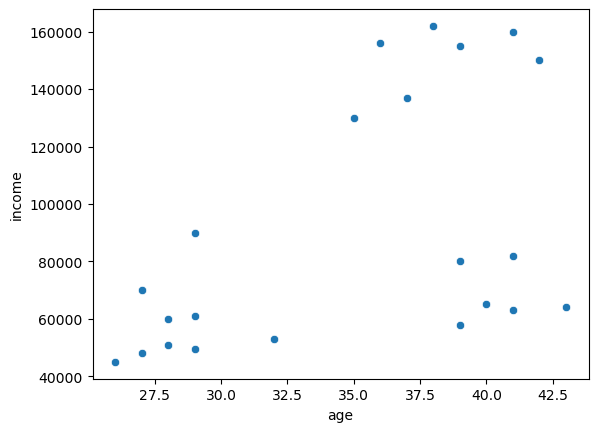

In [4]:
sns.scatterplot(x=df['age'], y=df['income'])
plt.show()

## Scale Data

In [5]:
scaler = MinMaxScaler()
df['age']= scaler.fit_transform(df[['age']])
df['income']= scaler.fit_transform(df[['income']])
df.head()

,age,income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [6]:
df.describe()

,age,income
count,22.000000,22.000000
mean,0.518717,0.388306
std,0.347121,0.371846
min,0.000000,0.000000
25%,0.176471,0.115385
50%,0.617647,0.192308
75%,0.808824,0.771368
max,1.000000,1.000000


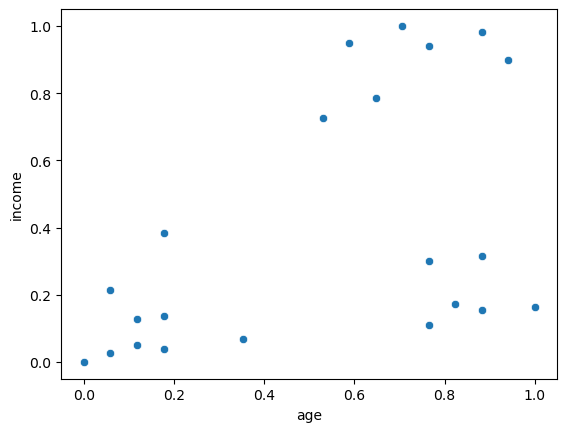

In [7]:
sns.scatterplot(x=df['age'], y=df['income'])
plt.show()

## Identify numbers of clusters using elbow method

In [8]:
k_clusters = range(1, 11)
sse=[]
for k in k_clusters:
    km= KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.26640301246684156,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562,
 0.08139933135681814]

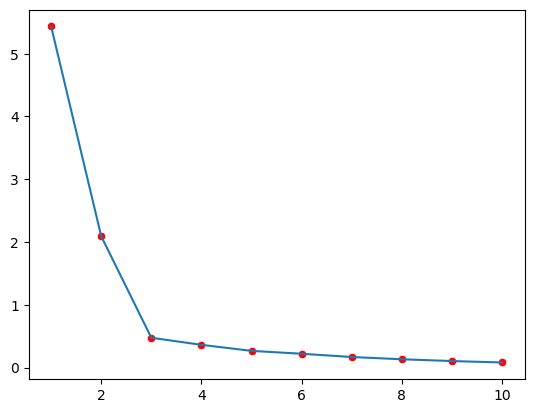

In [9]:
sns.lineplot(x=k_clusters, y=sse)
sns.scatterplot(x=k_clusters, y=sse, color="red")
plt.show()


## Fit and predict clusters

In [10]:
km= KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
y_pred

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [11]:
df['clusters']=y_pred
df.head()


,age,income,clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


## Find centroids

In [14]:
centroids = km.cluster_centers_
centroids
centroids_x=centroids[:,0]
centroids_y=centroids[:,1]

print(centroids)
print(centroids_x)
print(centroids_y)

[[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]
[0.72268908 0.1372549  0.85294118]
[0.8974359  0.11633428 0.2022792 ]


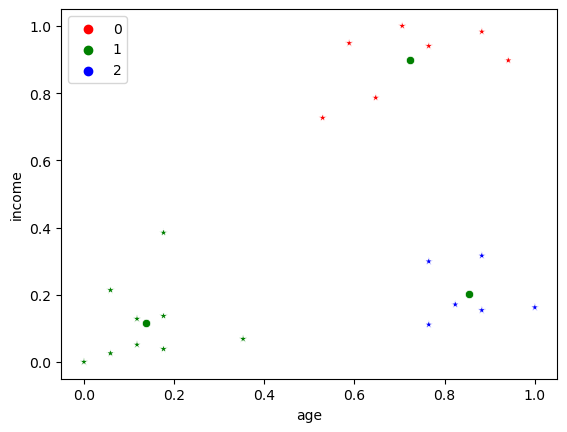

In [15]:
sns.scatterplot(x=df['age'], y=df['income'], hue=df['clusters'], palette=['red','green','blue'], marker="*")
sns.scatterplot(x=centroids_x, y=centroids_y, color="green")
plt.show()